In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#all the audio samples are single-channel(mono)
audio,sampleRate=librosa.load("audioData/Animals/Bird/ffb86d3c_nohash_0.wav")
sampleRate

22050

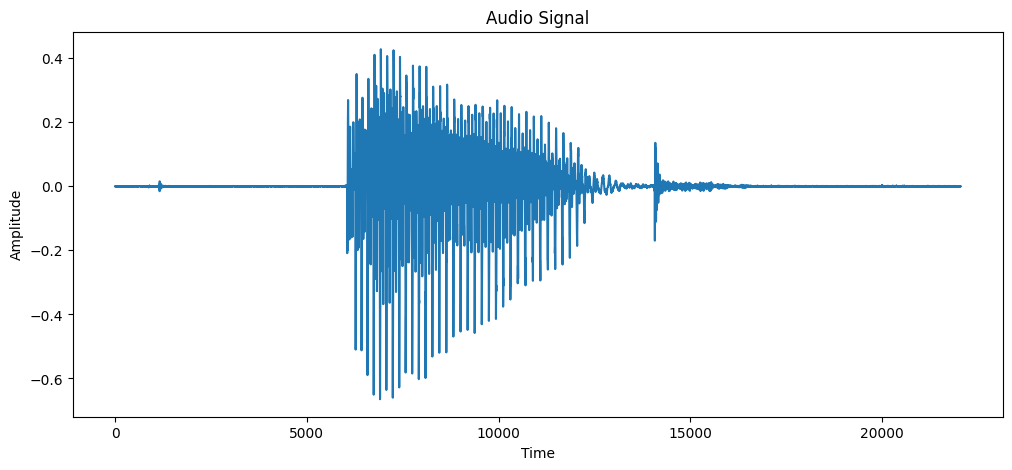

In [13]:
#Time vs Amplitude Graph of wav file
plt.figure(figsize=(12,5))
plt.plot(audio)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Signal")
plt.show()

In [6]:
# To generate MFCC, we follow the following steps:
# audioInput -> pre-emphasis -> framing -> windowing -> fourier transform -> Inverse Mel Scale Filter Bank -> Log() -> DCT ->
# Derivatives -> Feature Vector

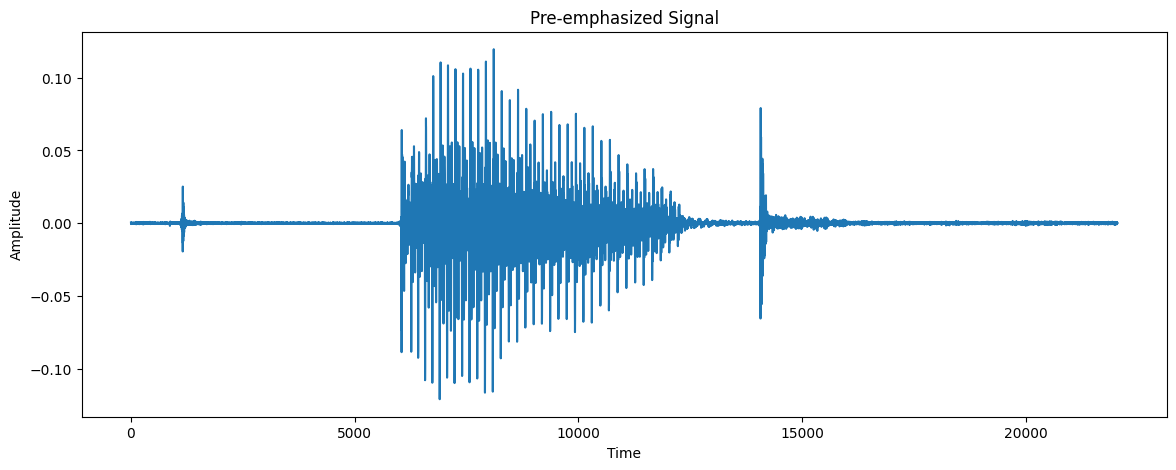

In [40]:
# Pre-emphasis layer
# Amplifies higher frequencies in order to balance the spectrum (higher frequencies have lower energies)
pre_emphasis = 0.97
audio_preemphasized=[]
for i in range(1,sampleRate):
    audio_preemphasized.append(audio[i]-audio[i-1]*pre_emphasis)

# Plot the pre-emphasized signal
plt.figure(figsize=(14, 5))
plt.plot(audio_preemphasized)
plt.title('Pre-emphasized Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Framing Layer
# Since the audio wave is more than a second, windowing is necesarry in order to fully capture the features and allow for correct
# calculations to be performed. Thus, for ease of calculations, we slice the wave.
# The signal/wave is separated into sections or frames of 25-30 milliseconds.

frame_size=650 # ~30 millisecond frame
audio_frames=[]

for i in range(0,sampleRate-frame_size,frame_size):
    audio_frames.append(audio_preemphasized[i:i+frame_size])

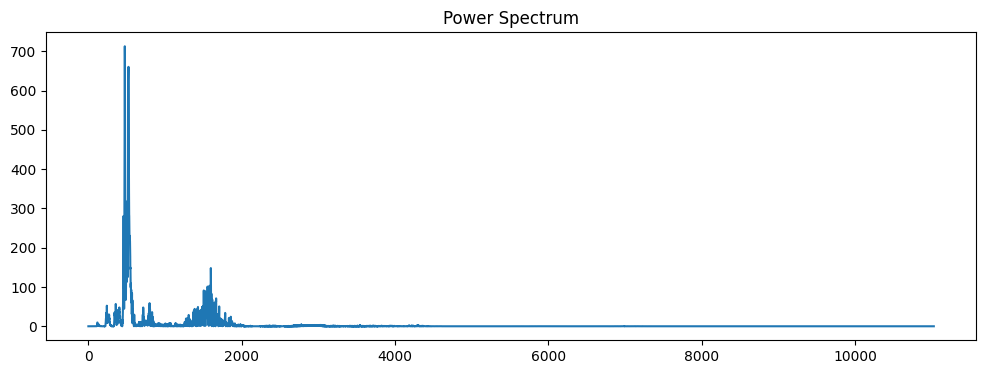

In [7]:
# FFT(Fast Fourier Transform) Layer
# Used to convert time-domain signal to frequency-domain to analyze frequency components of speech.
# Output of FFT gives complex frequency spectrum (both magnitude and phase)
# Since we only need magnitude, we evaluate the power spectrum from the output of FFT

complex_power_spectrum=np.fft.rfft(audio_preemphasized)
power_spectrum=pow(np.abs(complex_power_spectrum),2)

plt.figure(figsize=(12,4))
plt.plot(power_spectrum)
plt.title("Power Spectrum")
plt.show()

In [8]:
# Mel Scale Filter bank
nfilt = 40
low_freq_mel = 0
high_freq_mel = 2595 * np.log10(1 + (sampleRate / 2) / 700)  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = 700 * (10 ** (mel_points / 2595) - 1)  # Convert Mel to Hz
bin = np.floor((512 + 1) * hz_points / sampleRate)

fbank = np.zeros((nfilt, int(np.floor(512 / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

filter_banks = np.dot(power_spectrum, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical stability
filter_banks = 20 * np.log10(filter_banks)  # dB

# Plot the filter bank energies
plt.figure(figsize=(14, 5))
plt.imshow(filter_banks.T, cmap='hot', aspect='auto')
plt.title('Filter Bank Energies')
plt.xlabel('Frame Index')
plt.ylabel('Filter Index')

ValueError: shapes (11026,) and (257,40) not aligned: 11026 (dim 0) != 257 (dim 0)